# Facial Emotion Detection - visualizing principle components

#dimensionality-reduction #image-processing #pca #computer-vision

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

In [3]:
emo_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

In [4]:
df = pd.read_csv('data/fer2013/fer2013.csv')

In [5]:
# df['emotion_label'] = df['emotion'].apply(lambda x: emo_dict[x])

In [6]:
df.shape

(35887, 3)

In [7]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [8]:
# 2304 pixels each
len(df['pixels'][0].split())

2304

In [9]:
df['Usage'].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [10]:
df['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

# Data cleaning

Convert into numpy array
The contents of this string a space-separated pixel values in row major order

In [26]:
# Convert pixels into pd.Series of numpy arrays
df['pixels'] = df['pixels'].apply(lambda x: np.array(x.split(), dtype=np.float))

In [27]:
df['pixels']

0        [70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63....
1        [151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 111...
2        [231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 161...
3        [24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20....
4        [4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
5        [55.0, 55.0, 55.0, 55.0, 55.0, 54.0, 60.0, 68....
6        [20.0, 17.0, 19.0, 21.0, 25.0, 38.0, 42.0, 42....
7        [77.0, 78.0, 79.0, 79.0, 78.0, 75.0, 60.0, 55....
8        [85.0, 84.0, 90.0, 121.0, 101.0, 102.0, 133.0,...
9        [255.0, 254.0, 255.0, 254.0, 254.0, 179.0, 122...
10       [30.0, 24.0, 21.0, 23.0, 25.0, 25.0, 49.0, 67....
11       [39.0, 75.0, 78.0, 58.0, 58.0, 45.0, 49.0, 48....
12       [219.0, 213.0, 206.0, 202.0, 209.0, 217.0, 216...
13       [148.0, 144.0, 130.0, 129.0, 119.0, 122.0, 129...
14       [4.0, 2.0, 13.0, 41.0, 56.0, 62.0, 67.0, 87.0,...
15       [107.0, 107.0, 109.0, 109.0, 109.0, 109.0, 110...
16       [14.0, 14.0, 18.0, 28.0, 27.0, 22.0, 21.0, 30..

# Plot

In [28]:
def plot_first_100_faces(df):
    plt.figure(figsize=(15, 15))
    for i in xrange(0, 100):
        plt.subplot(10, 10, i+1)
        data = df['pixels'][i].reshape((48, 48))
        plt.imshow(data, cmap='gray')
        plt.xticks([])
        plt.yticks([])
        plt.ylabel('hi')
        plt.axis('off')

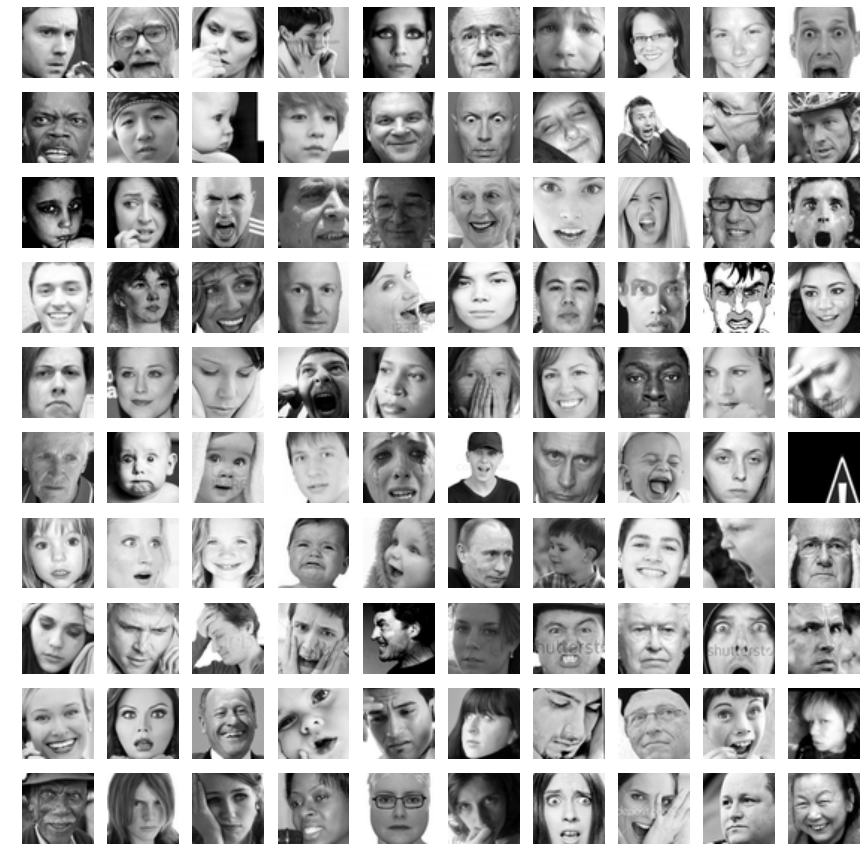

In [29]:
plot_first_100_faces(df)

In [ ]:
# eigenvalue is a number, telling you how much variance there is in the data in that direction
# highest eigenvalue = principle component

# Highest eigenvalues - Eigenvalues that span the most

# reduced dimensions, classifiers have more redundancy, for better hyperplane

# can do facial recognition, similarity insensitive to lighting, expression, orientation

In [39]:
from scipy.sparse.linalg import eigs

In [68]:
def make_image_vector(image_list, new_size):
    D = np.empty([len(image_list), new_size])
    i = 0
    for image in image_list:
        D[i, :] = image
        i += 1
    return D

In [35]:
def avgfaces_by_emotion(df):
    avgfaces = []
    
    for emotion in sorted(df['emotion'].unique()):
        sub_df = df[df['emotion']==emotion]
        
        avg_pixels = np.mean(sub_df['pixels'].values)

        avgfaces.append((avg_pixels, emotion))
        
    return avgfaces

In [64]:
def eigenfaces_by_emotion(df, k=1):
    eigenfaces = []
    
    for emotion in sorted(df['emotion'].unique()):
        sub_df = df[df['emotion']==emotion]
        
        pixels = list(sub_df['pixels'].values)
        D = make_image_vector(pixels, 48*48)
        A = np.dot(D.T, D)
        
        # Find k largest magnitude (LM) eigenvectors
        vals, vecs = eigs(A, k, which='LM')
        
        eigenfaces.extend([(vec.reshape(48, 48).astype(float), emotion) for vec in vecs.T])
        
    return eigenfaces

In [37]:
avgfaces = avgfaces_by_emotion(df)

In [65]:
eigenfaces = eigenfaces_by_emotion(df, 1)

/Users/carmenlai/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: ComplexWarning: Casting complex values to real discards the imaginary part


In [54]:
# Plot eigenfaces and show emotion label
def plot_face_and_emotion(plot_nrow, plot_ncol, face_list):
    fig, axes = plt.subplots(plot_nrow, plot_ncol, figsize=(15, 15))
    for i, (face, emotion) in enumerate(face_list):
        ax = axes.ravel()[i]
        ax.imshow(face.reshape(48, 48), cmap='gray')
        # Turn off tick labels
        ax.set_xlabel(emo_dict[emotion])
        ax.set_yticklabels([])
        ax.set_xticklabels([])

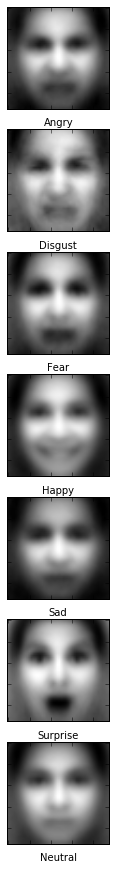

In [55]:
plot_face_and_emotion(7, 1, avgfaces)

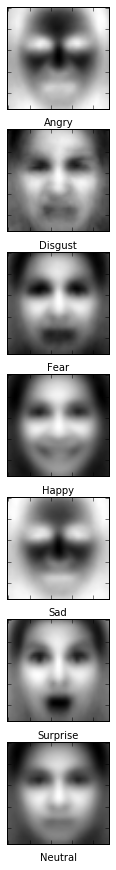

In [56]:
plot_face_and_emotion(7, 1, eigenfaces)

# eigenvectors capture variation
mean_face + coef*eigen1 + coef*eigen2...

To find vectors that best account for variation of face images in entire       image space.
These vectors are called eigen         vectors.
Construct a face space and project  the images into this face space         (eigenfaces).


In [58]:
from sklearn import datasets
digits = datasets.load_digits(n_class=6)

In [59]:
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   0., ...,   9.,   0.,   0.],
       [  0.,   0.,   0., ...,   4.,   0.,   0.],
       [  0.,   0.,   6., ...,   6.,   0.,   0.]])

# PCA

In [71]:
from sklearn import decomposition

In [69]:
X = make_image_vector(df['pixels'], 48*48)

Scale the data

In [79]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

In [80]:
pca = decomposition.PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

Scree plot to see num components

In [81]:
def scree_plot(pca, title=None):
    num_components = pca.n_components_
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    plt.figure(figsize=(10, 6), dpi=250)
    ax = plt.subplot(111)
    ax.bar(ind, vals, 0.35,
           color=[(0.949, 0.718, 0.004),
                  (0.898, 0.49, 0.016),
                  (0.863, 0, 0.188),
                  (0.694, 0, 0.345),
                  (0.486, 0.216, 0.541),
                  (0.204, 0.396, 0.667),
                  (0.035, 0.635, 0.459),
                  (0.486, 0.722, 0.329),
                 ])

    for i in xrange(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)

    ax.set_xticklabels(ind,
                       fontsize=12)

    ax.set_ylim(0, max(vals)+0.05)
    ax.set_xlim(0-0.45, 8+0.45)

    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)

    ax.set_xlabel("Principal Component", fontsize=12)
    ax.set_ylabel("Variance Explained (%)", fontsize=12)

    if title is not None:
        plt.title(title, fontsize=16)

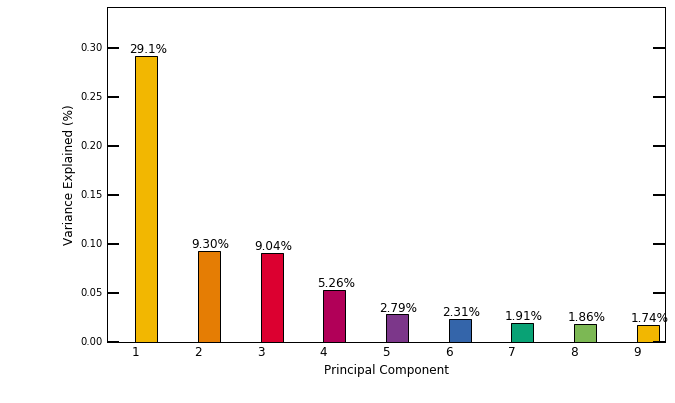

In [82]:
scree_plot(pca, title="Scree Plot for Faces PCA")

In [83]:
X_pca.shape

(35887, 10)